In [57]:

from pdxcrime.data.bar.crime import mix_crime
from pdxcrime.data.bar.real_estate import mix_real_estate

import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from datetime import date


%matplotlib widget

import pandas as pd

In [58]:
redf = mix_real_estate()
crimedf = mix_crime()

c = set(crimedf.Neighborhood.unique())
r = set(redf.Neighborhood.unique())

# strip out the {'DUNTHORPE', 'MULT CO RIVERDALE AREA (DUNTHORPE)'} Neighborhoods
redf = redf[~(redf.Neighborhood.isin(r -c))]

# both 2015 and 2021 are partial data sets for crime data. remove them both
redf = redf[(redf.Year > 2015) & (redf.Year < 2021)]
crimedf = crimedf[(crimedf.Year > 2015) & (crimedf.Year < 2021)]
crimedf = crimedf[~(crimedf.Neighborhood == 'NORTHWEST INDUSTRIAL')]


In [59]:
avg_housing_price_by_year = redf.groupby("Year").agg({"AverageSalePrice": ['mean']})
hp_pct_change = avg_housing_price_by_year.pct_change().fillna(0)
hp_pct_change


crime_by_year = crimedf.groupby(["Year"]).sum()['OffenseCount']
crime_pct_change = crime_by_year.pct_change().fillna(0)
crime_pct_change

Year
2016    0.000000
2017    0.045618
2018    0.015004
2019   -0.022224
2020    0.005235
Name: OffenseCount, dtype: float64

In [60]:
crime_by_year_by_neigh = crimedf.groupby(["Year", "Neighborhood"]).sum()['OffenseCount']
crime_by_year_by_neigh_pct_change = crime_by_year_by_neigh.unstack().pct_change().fillna(0)


re_by_year_by_neigh = redf.groupby(["Year", "Neighborhood"]).agg({"AverageSalePrice": ['mean']})
re_by_year_by_neigh_pct_change = re_by_year_by_neigh.unstack().pct_change().fillna(0)


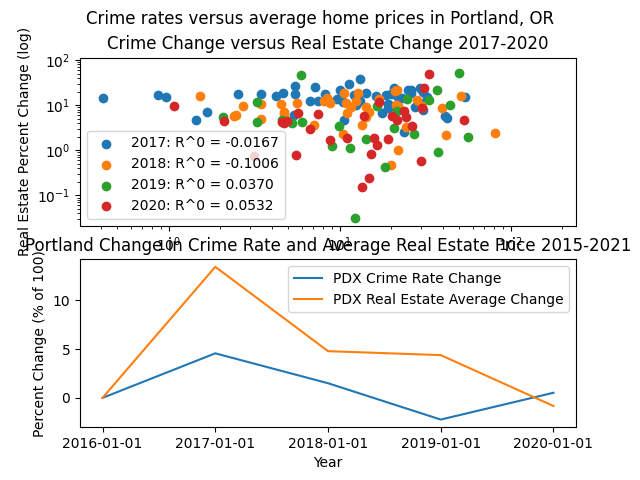

In [62]:
fig, axs = plt.subplots(2)
fig.suptitle('Crime rates versus average home prices in Portland, OR')

#plt.figure()
for year in range(2017, 2021):
    x = crime_by_year_by_neigh_pct_change.loc[year].values * 100
    y = re_by_year_by_neigh_pct_change.loc[year].values * 100
    corr, _ = pearsonr(x, y)
    axs[0].scatter(x, y , label=f'{year}: R^0 = {corr:.4f}')
    
#plt.title("Portland Change in Crime Rate and Average Real Estate Price 2015-2021")
axs[0].set_xlabel("Crime Percent Change (log)")
axs[0].set_ylabel("Real Estate Percent Change (log)")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title("Crime Change versus Real Estate Change 2017-2020")
axs[0].legend()

x_axis = [str(date(y, 1, 1)) for y in crime_pct_change.index.values]
axs[1].plot(x_axis, crime_pct_change.values * 100, label="PDX Crime Rate Change")
axs[1].plot(x_axis, hp_pct_change.values * 100, label="PDX Real Estate Average Change")
axs[1].set_title("Portland Change in Crime Rate and Average Real Estate Price 2015-2021")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Percent Change (% of 100)")
axs[1].legend()
